Project Week 04

In [4]:
#packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, t
import matplotlib.pyplot as plt
from scipy.optimize import minimize

- Problem 1

Calculate and compare the expected value and standard deviation of price at time t $(𝑃_{t})$ ,given each of the 3 types of price returns, assuming $𝑟 ∼ 𝑁 (0, σ2)$ . Simulate each return equation using $𝑟 ∼ 𝑁 (0, σ2)$  and show the mean and standard deviation match your expectations.

In [11]:
prices = pd.read_csv("/Users/ahmedibrahim/Desktop/Mids/Fall24/Quantitative Risk Management/exam prep/try_juhas/Week04_answers/DailyPrices.csv").drop("Date", axis=1)
returns = pd.read_csv("/Users/ahmedibrahim/Desktop/Mids/Fall24/Quantitative Risk Management/exam prep/try_juhas/Week04_answers/DailyReturn.csv").drop("Date", axis=1)


# returns.head()


In [8]:
def calculate_prices(returns, initial_price, method="classical_brownian", print_calc = True):
    #initial price
    prices = [initial_price]

    for i in range(len(returns)):
        r_t = returns.iloc[i]

        if method == "classical_brownian":
            # Classical Brownian Motion: P_t = P_{t-1} + r_t
            p_t = prices[i] + r_t
        elif method == "arithmetic_return":
            # Arithmetic Return System: P_t = P_{t-1}(r_t + 1)
            p_t = prices[i] * (1 + r_t)
        elif method == "geometric_brownian":
            # Log Return or Geometric Brownian Motion: P_t = P_{t-1}*e^{r_t}
            p_t = prices[i] * np.exp(r_t)
        else:
            raise ValueError("Invalid method. Supported methods are 'classical_brownian', 'arithmetic_return', and 'geometric_brownian'.")

        prices.append(p_t)

    expected_value = np.mean(prices)
    std_deviation = np.std(prices)
    if print_calc == True:
        print(f"Expected value of {method}: {expected_value}")
        print(f"Standard Deviation of {method}: {std_deviation}\n")

    return prices, expected_value, std_deviation

Stock with mean closest to 0 is PLD with mean of 0.000031

True Expected Value of PLD: 117.44913894360901
True Standard Deviation of PLD: 7.594811340185505

Expected value of classical_brownian: 120.09193097024111
Standard Deviation of classical_brownian: 0.0763205040437937

Expected value of arithmetic_return: 117.44913894360951
Standard Deviation of arithmetic_return: 7.594811340185682

Expected value of geometric_brownian: 120.69268550037275
Standard Deviation of geometric_brownian: 8.824250830279567

Simulated Expected Value of classical_brownian: 120.0935581201541
Simulated Standard Deviation of classical_brownian: 0.11386623614666738

Simulated Expected Value of arithmetic_return: 119.80374311963752
Simulated Standard Deviation of arithmetic_return: 13.82183157242584

Simulated Expected Value of geometric_brownian: 122.36489650793345
Simulated Standard Deviation of geometric_brownian: 13.765310392097724



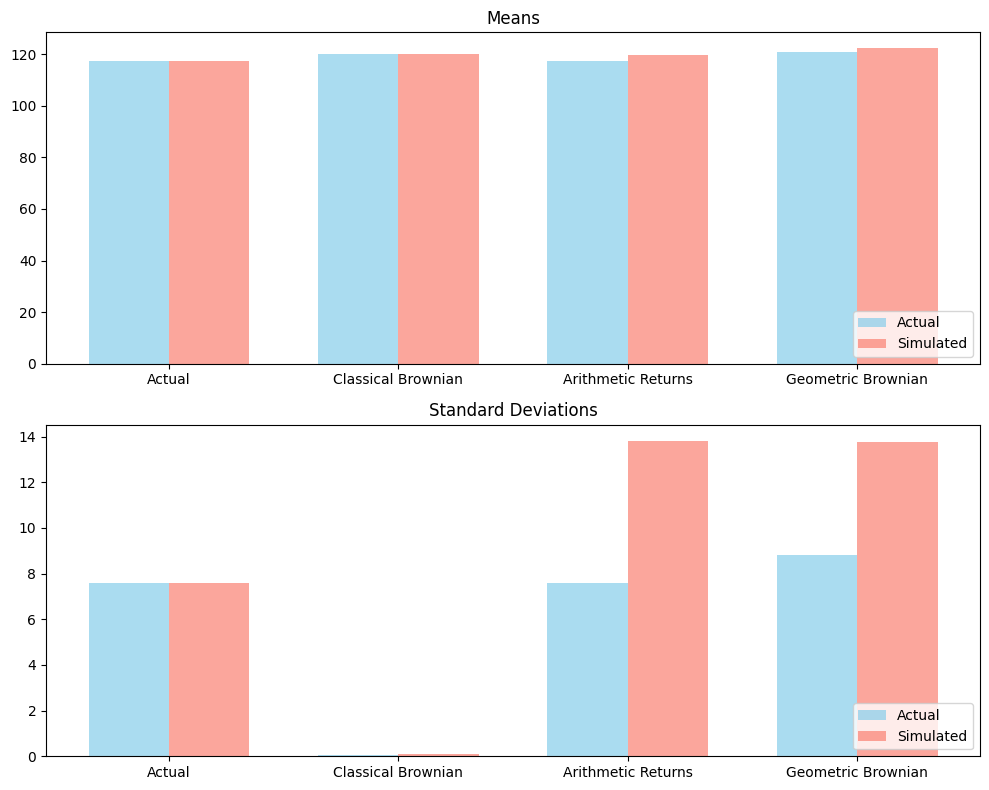

In [12]:
best_col = None
best_avg = 1
for col in returns.columns:
    avg = returns[col].mean()
    if abs(avg) < best_avg:
        best_col = col
        best_avg = abs(avg)
print(f"Stock with mean closest to 0 is {best_col} with mean of {best_avg:.6f}\n")

print(f"True Expected Value of {best_col}: {np.mean(prices[best_col])}")
print(f"True Standard Deviation of {best_col}: {np.std(prices[best_col])}\n")

# Performing calculations only on the best col for simplicity of analysis
initial_price = prices[best_col].iloc[0]
test_returns = returns[best_col]

# Calculate with classical brownian formula
classical_prices, classical_mean, classical_std = calculate_prices(test_returns, initial_price, method="classical_brownian")

# Calculate with arithmetic return formula
arithmetic_prices, arithmetic_mean, arithmetic_std = calculate_prices(test_returns, initial_price, method="arithmetic_return")

# Calculate with geometric brownian formula
geometric_prices, geometric_mean, geometric_std = calculate_prices(test_returns, initial_price, method="geometric_brownian")

def simulate_price_return_formulas(std_dev_returns, initial_price, method_form, num_sims = 1000):

    num_samples = len(returns[best_col])
    # Initialize arrays to contain simulation results
    sim_means = np.zeros(num_sims)
    sim_stds = np.zeros(num_sims)

    for i in range(num_sims):
        # Simulate a random returns based on the std dev of returns for this column
        sim_returns = np.random.normal(0, std_dev_returns, num_samples)
        sim_returns = pd.Series(sim_returns)
        sim_prices, sim_mean, sim_std = calculate_prices(sim_returns, initial_price, method=method_form, print_calc = False)
        sim_means[i] = sim_mean
        sim_stds[i] = sim_std


    # Show the mean and std dev match your expectations
    print(f"Simulated Expected Value of {method_form}: {np.mean(sim_means)}")
    print(f"Simulated Standard Deviation of {method_form}: {np.mean(sim_stds)}\n")
    return np.mean(sim_means), np.mean(sim_stds)

# Simulate each return equation using r_t ~ N(0, σ^2)
std_dev_returns = returns[best_col].std()

# Simulate using classical brownian
sim_classical_mean, sim_classical_std = simulate_price_return_formulas(std_dev_returns, initial_price, method_form="classical_brownian")

# Simulate using Arthimetic Returns
sim_arithmetic_mean, sim_arithmetic_std = simulate_price_return_formulas(std_dev_returns, initial_price, method_form="arithmetic_return")

# Simulate using Geometric Brownian
sim_geometric_mean, sim_geometric_std = simulate_price_return_formulas(std_dev_returns, initial_price, method_form="geometric_brownian")


# Define method names and their corresponding means and standard deviations
methods = ["Actual", "Classical Brownian", "Arithmetic Returns", "Geometric Brownian"]
means = [np.mean(prices[best_col]), classical_mean, arithmetic_mean, geometric_mean]
stds = [np.std(prices[best_col]), classical_std, arithmetic_std, geometric_std]

# Simulated means and standard deviations
simulated_means = [means[0], sim_classical_mean, sim_arithmetic_mean, sim_geometric_mean]
simulated_stds = [stds[0], sim_classical_std, sim_arithmetic_std, sim_geometric_std]

# Define the width of the bars
bar_width = 0.35

# Create an array for the x-coordinates of the bars
x = np.arange(len(methods))

# Define distinct colors for actual and simulated bars
actual_color = 'skyblue'
simulated_color = 'salmon'

# Create subplots for means and standard deviations
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot means
ax1.bar(x - bar_width/2, means, label='Actual', alpha=0.7, color=actual_color, width=bar_width)
ax1.bar(x + bar_width/2, simulated_means, label='Simulated', alpha=0.7, color=simulated_color, width=bar_width)
ax1.set_xticks(x)
ax1.set_xticklabels(methods)
ax1.set_title('Means')
ax1.legend(loc = 'lower right')

# Plot standard deviations
ax2.bar(x - bar_width/2, stds, label='Actual', alpha=0.7, color=actual_color, width=bar_width)
ax2.bar(x + bar_width/2, simulated_stds, label='Simulated', alpha=0.7, color=simulated_color, width=bar_width)
ax2.set_xticks(x)
ax2.set_xticklabels(methods)
ax2.set_title('Standard Deviations')
ax2.legend(loc = 'lower right')

plt.tight_layout()
plt.show()

- Problem 2

Implement a function similar to the “return_calculate()” in this week’s code. Allow the user to specify the method of return calculation.
Use DailyPrices.csv. Calculate the arithmetic returns for all prices.
Remove the mean from the series so that the mean(META)=0
Calculate VaR

1. Using a normal distribution.

2. Using a normal distribution with an Exponentially Weighted variance (λ = 0. 94)

3. Using a MLE fitted T distribution.

4. Using a fitted AR(1) model.

5. Using a Historic Simulation.

Compare the 5 values.

In [8]:
prices = pd.read_csv("/Users/ahmedibrahim/Desktop/Mids/Fall24/Quantitative Risk Management/exam prep/try_juhas/Week04_answers/DailyPrices.csv")
returns = pd.read_csv("/Users/ahmedibrahim/Desktop/Mids/Fall24/Quantitative Risk Management/exam prep/try_juhas/Week04_answers/DailyReturn.csv")


In [11]:
def calculate_ewma_covariance_matrix(df, lambd):
    # Get the number of time steps n and vars m
    n, m = df.shape  
    
    # Initialize the exponentially weighted covariance matrix as a square matrix with dimensions (m, m)
    ewma_cov_matrix = np.zeros((m, m))  
    
    # Calculate the weights and normalized weights for each time step
    # w_{t_i} = (1-lambda)*lambda^{i-1}
    weights = [(1 - lambd) * lambd**(i) for i in range(n)]  
    weights = weights[::-1]
    #### Flip the weights

    # Calculate the sum of weights to normalize them
    total_weight = sum(weights)  # sum w_{t-j}
    
    # Normalize the weights by dividing each weight by the total weight
    # w_{t_i}^hat = w_{t_i} / sum w_{t-j}
    normalized_weights = [w / total_weight for w in weights]  
    
    # Calculate the means for each variable across all time steps
    means = df.mean()  
    
    # Calculate the exponentially weighted covariance matrix
    for t in range(n):
        # Calculate the deviation of each variable at time t from its mean
        deviation = df.iloc[t, :] - means  
        
        # weighted deviation from means for x and y
        ### NEED TO PERFORM ELEMENT WISE OPERATION, FIX THIS
        ewma_cov_matrix += normalized_weights[t] * deviation.values.reshape(-1, 1) @ deviation.values.reshape(1, -1)
    ewma_cov_matrix = pd.DataFrame(ewma_cov_matrix)
    return ewma_cov_matrix

In [12]:
alpha = 0.05
def return_calculate(prices_df, method="DISCRETE", date_column="Date"):
    vars = prices_df.columns
    n_vars = len(vars)
    vars = [var for var in vars if var != date_column]
    
    if n_vars == len(vars):
        raise ValueError(f"date_column: {date_column} not in DataFrame: {vars}")
    
    n_vars = n_vars - 1
    
    p = prices_df[vars].values
    n = p.shape[0]
    m = p.shape[1]
    p2 = np.empty((n-1, m))
    
    for i in range(n-1):
        for j in range(m):
            p2[i, j] = p[i+1, j] / p[i, j]
    
    if method.upper() == "DISCRETE":
        p2 = p2 - 1.0
    elif method.upper() == "LOG":
        p2 = np.log(p2)
    else:
        raise ValueError(f"method: {method} must be in (\"LOG\",\"DISCRETE\")")
    
    dates = prices_df[date_column].iloc[1:]
    
    # Create a new DataFrame with all columns
    data = {date_column: dates}
    for i in range(n_vars):
        data[vars[i]] = p2[:, i]
    
    out = pd.DataFrame(data)
    
    return out

# Use DailyPrices.csv
# prices = pd.read_csv("Week04/DailyPrices.csv")

prices = pd.read_csv("/Users/ahmedibrahim/Desktop/Mids/Fall24/Quantitative Risk Management/exam prep/try_juhas/Week04_answers/DailyPrices.csv")

# Calculate arithmetic returns for all prices
returns = return_calculate(prices)
meta_returns = returns['META']
# Remove the mean from the series so that the mean(META)=0

# Calculate the mean of the "META" column
mean_meta = meta_returns.mean(numeric_only=True)

# Subtract the mean from the "META" column to center the data
centered_returns = meta_returns - mean_meta

print("Mean of META: ", centered_returns.mean(numeric_only=True))

# Calculate VaR:
def calc_var_normal(mean, std_dev, alpha=0.05):
    VaR = norm.ppf(alpha, mean, std_dev)

    return VaR

### Normal Distribution
# calculate std_dv and mean of returns
sigma = centered_returns.std()
mean = centered_returns.mean(numeric_only=True)
norm_var = calc_var_normal(mean, sigma)
print(f"Normal Distribution VaR: {norm_var:.4f}")

### Normal Distribution with exp weighted var l     ambda = 0.94
df = centered_returns.to_frame()
ew_covar = calculate_ewma_covariance_matrix(df, 0.94)
ew_std_dev = np.sqrt(np.diag(ew_covar))
mean = centered_returns.mean(numeric_only=True)
norm_var_exp = calc_var_normal(mean, ew_std_dev)[0]
print(f"Normal Distribution Exp Weighted VaR: {norm_var_exp:.4f}")

### MLE fitted T distribution

# Fixed MLE for t distribution for just the dataframe values input
def mle_t_distribution(y):
    # Define the likelihood function for the t-distribution
    def neg_log_likelihood(params, y):
        mean, var, df = params
        adjusted_y = y - mean
        log_likeli = -np.sum(t.logpdf(adjusted_y, df, loc=mean, scale=var))
        return log_likeli

    # Calculate initial guess for mean, standard deviation, and degrees of freedom
    mean_guess = np.mean(y)
    std_dev_guess = np.std(y)
    df_guess = len(y)

    # Initial guess for optimization
    initial_params = [mean_guess, std_dev_guess, df_guess]

    # Perform optimization through minimization of negative log likelihood
    result = minimize(neg_log_likelihood, initial_params, args=(y,), method='Nelder-Mead')

    # Extract optimized parameters
    optimized_mean, optimized_std_dev, optimized_df = result.x

    return optimized_mean, optimized_std_dev, optimized_df

# Call the function to estimate parameters and calculate VaR
t_mean, t_std, t_df = mle_t_distribution(centered_returns.values)

t_VaR = t.ppf(alpha, t_df, loc=t_mean, scale=t_std)
print(f"MLE Fitted t-distribution VaR: {t_VaR:.4f}")

### AR(1) method
def simulate_ar1_process(N, alpha, sigma, mu, num_steps):
    # Initialize variables
    y = np.empty((N, num_steps))
    
    for i in range(N):
        # Generate random noise
        epsilon = np.random.normal(0, sigma, num_steps)
        # initial value
        y[i, 0] = mu + epsilon[0]
        
        for t in range(1, num_steps):
            y[i, t] = mu + alpha * (y[i, t - 1] - mu) + epsilon[t]
    
    return y

# Parameters
N = 10000  # Number of simulations
ar_coef = 0.5  # Autoregressive coefficient
sigma = centered_returns.std()  # Standard deviation of centered returns
mu = centered_returns.mean()  # Mean of centered returns
num_steps = len(centered_returns)  # Number of time steps

# Simulate AR(1) process
ar1_simulated_data = simulate_ar1_process(N, ar_coef, sigma, mu, num_steps)

# Extract the last time step values for each simulation run
final_values = ar1_simulated_data[:, -1]

# Calculate VaR by finding the quantile at alpha
var_alpha = np.percentile(final_values, 100 * alpha)

print(f"AR(1) Process VaR: {var_alpha:.4f}")

### Historical Simulation
# Step 1: Calculate Current Portfolio Value
# Assuming you hold 86 shares of META obtained from the portfolio holdings listings
portfolio_value = 86 * prices['META'].iloc[-1]

# Step 2: Simulate N draws from history with replacement
N = 10000
historical_returns = centered_returns.values  # Use centered returns
historical_simulations = np.random.choice(historical_returns, size=(N, len(historical_returns)), replace=True)

# Step 3: Calculate new prices from the returns
simulated_prices = np.zeros_like(historical_simulations)
simulated_prices[:, 0] = prices['META'].iloc[-1]

for i in range(1, len(historical_returns)):
    simulated_prices[:, i] = simulated_prices[:, i - 1] * (1 + historical_simulations[:, i])

# Step 4: Price each asset for all N draws
# (This step is implicitly done when we calculate portfolio values)

# Step 5: Calculate portfolio Value for each N Draw
portfolio_values = simulated_prices[:, -1]

# Step 6: Get the alpha percentile of the distribution
alpha_percentile = np.percentile(portfolio_values, 100*alpha)
VaR = -alpha_percentile/portfolio_value
print(f"Historical Simulation VaR: {VaR:.4f}")

Mean of META:  1.25685625429263e-18
Normal Distribution VaR: -0.0543
Normal Distribution Exp Weighted VaR: -0.0300
MLE Fitted t-distribution VaR: -0.0421
AR(1) Process VaR: -0.0628
Historical Simulation VaR: -0.0041


- Problem 3 
Using Portfolio.csv and DailyPrices.csv. Assume the expected return on all stocks is 0.

This file contains the stock holdings of 3 portfolios. You own each of these portfolios. Using an exponentially weighted covariance with lambda = 0.94, calculate the VaR of each portfolio as well as your total VaR (VaR of the total holdings). Express VaR as a $.

Discuss your methods and your results.

Choose a different model for returns and calculate VaR again. Why did you choose that model? How did the model change affect the results?


In [13]:
portfolio = pd.read_csv('/Users/ahmedibrahim/Desktop/Mids/Fall24/Quantitative Risk Management/exam prep/try_juhas/Week04_answers/Project/Portfolio.csv')

portfolio.head()

,Portfolio,Stock,Holding
0,A,AAPL,158
1,A,MSFT,178
2,A,AMZN,110
3,A,NVDA,54
4,A,GOOGL,69


In [15]:
def calculate_portfolio_var(portfolio, price_df, returns_df, lambd, alpha = 0.05):
    # calculate total portfolio value
    portfolio_value = 0.0
    # create array to store each stock's value
    delta = []
    for _, row in portfolio.iterrows():
        stock_value = row['Holding']*price_df[row['Stock']].iloc[-1]
        portfolio_value += stock_value
        delta.append(stock_value)

    print(f"Portfolio Value: {portfolio_value}")
    delta = np.array(delta)
    normalized_delta = delta / portfolio_value
    
    exp_weighted_cov = calculate_ewma_covariance_matrix(returns_df, lambd)
    exp_weighted_std = np.sqrt(np.diagonal(exp_weighted_cov))
    
    # Create a dictionary to store column titles and corresponding exp_weighted_std values
    result_dict = {column: std for column, std in zip(returns_df.columns, exp_weighted_std)}
    
    exp_weighted_std_portfolio = np.array([result_dict[stock] for stock in portfolio['Stock']])

    p_sig = np.sqrt(np.dot(np.dot(normalized_delta, exp_weighted_std_portfolio), normalized_delta))
    
    VaR = -delta * norm.ppf(1-alpha)*p_sig
    total_VaR = sum(VaR)

    print(f"Porftolio Value at Risk: ${total_VaR}\n")
    return total_VaR

# Using Portfolio and DailyPrices assume the expected return on all stocks is 0
# portfolio = pd.read_csv("Week04/Project/portfolio.csv")
portfolio = pd.read_csv('/Users/ahmedibrahim/Desktop/Mids/Fall24/Quantitative Risk Management/exam prep/try_juhas/Week04_answers/Project/Portfolio.csv')

port_a = portfolio[portfolio['Portfolio'] == "A"]
port_b = portfolio[portfolio['Portfolio'] == "B"]
port_c = portfolio[portfolio['Portfolio'] == "C"]

# Load in Prices and Returns
# prices = pd.read_csv("Week04/DailyPrices.csv")
# returns = pd.read_csv("Week04/DailyReturn.csv").drop('Date', axis=1)

prices = pd.read_csv("/Users/ahmedibrahim/Desktop/Mids/Fall24/Quantitative Risk Management/exam prep/try_juhas/Week04_answers/DailyPrices.csv")
returns = pd.read_csv("/Users/ahmedibrahim/Desktop/Mids/Fall24/Quantitative Risk Management/exam prep/try_juhas/Week04_answers/DailyReturn.csv").drop("Date", axis=1)



# print(returns.head())


# Using exp weighted covar lambda = 0.94, calculate VaR of each port (VaR as $)
print("Calculating individual portfolio VaR, Lambda = 0.94")
calculate_portfolio_var(port_a, prices, returns, lambd = 0.94)
calculate_portfolio_var(port_b, prices, returns, lambd = 0.94)
calculate_portfolio_var(port_c, prices, returns, lambd = 0.94)

# Using exp weighted covar lambda = 0.94, calculate VaR of total holdings (VaR as $)
print("Calculating total portfolio VaR, Lambda = 0.94")
calculate_portfolio_var(portfolio, prices, returns, lambd = 0.94)

# Using exp weighted covar lambda = test_lambd, calculate VaR of each port (VaR as $)
test_lambd = 0.80
print(f"Calculating individual portfolio VaR, Lambda = {test_lambd}")
calculate_portfolio_var(port_a, prices, returns, lambd = test_lambd)
calculate_portfolio_var(port_b, prices, returns, lambd = test_lambd)
calculate_portfolio_var(port_c, prices, returns, lambd = test_lambd)

# Using exp weighted covar lambda = test_lambd, calculate VaR of total holdings (VaR as $)
print(f"Calculating total portfolio VaR, Lambda = {test_lambd}")
calculate_portfolio_var(portfolio, prices, returns, lambd = test_lambd)

Calculating individual portfolio VaR, Lambda = 0.94
Portfolio Value: 1089316.15994
Porftolio Value at Risk: $-47798.409049778915

Portfolio Value: 574542.4051499999
Porftolio Value at Risk: $-23249.992892062186

Portfolio Value: 1387409.5075200002
Porftolio Value at Risk: $-78936.99709172313

Calculating total portfolio VaR, Lambda = 0.94
Portfolio Value: 3051268.07261
Porftolio Value at Risk: $-91962.09430415335

Calculating individual portfolio VaR, Lambda = 0.8
Portfolio Value: 1089316.15994
Porftolio Value at Risk: $-47947.51282719366

Portfolio Value: 574542.4051499999
Porftolio Value at Risk: $-23174.652920582706

Portfolio Value: 1387409.5075200002
Porftolio Value at Risk: $-75319.36115437912

Calculating total portfolio VaR, Lambda = 0.8
Portfolio Value: 3051268.07261
Porftolio Value at Risk: $-90127.71549045567



-90127.71549045567